<a href="https://colab.research.google.com/github/witkov/chi-squared/blob/master/chisq_expert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Number of data points: 3
Best-fit slope: 1.069 ± 0.075
Best-fit intercept: 1.109 ± 0.147
Min_chi2: 0.655
slope_uncertainty: 0.050
Good fit min_chi2 range: 0.551 to 5.449




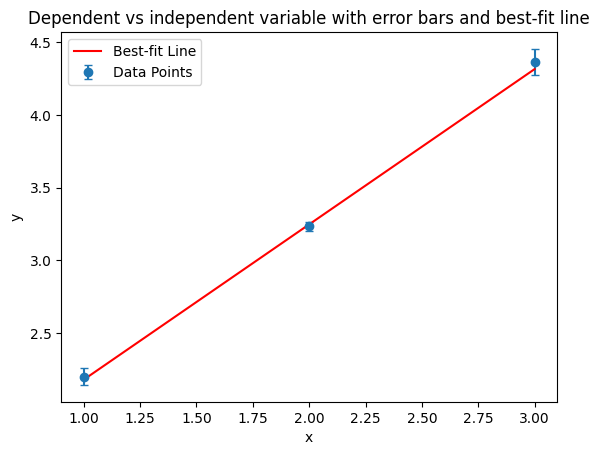

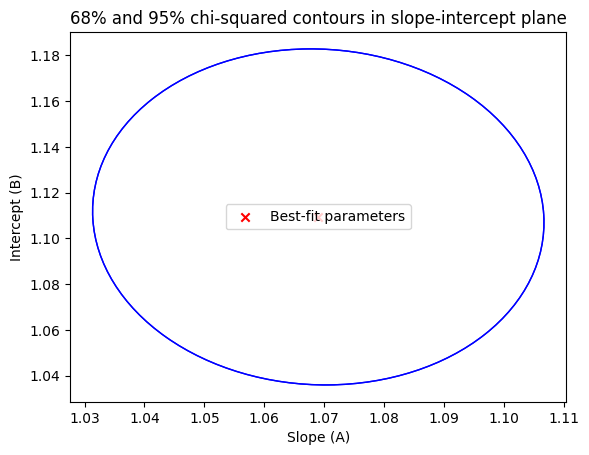

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.optimize import minimize_scalar

# *** EDIT DATA AND MODEL ***

x_mean = np.array([1, 2, 3]) # Enter distinct (non-repeating) values of independent variable.
y_mean =np.array([2.200, 3.233, 4.367]) # Enter means of dependent variable measurements.
n = np.array([3, 3, 3]) # Enter number of measurements at each distinct value of independent variable.
sigma_y = np.array([0.1, 0.0577, 0.153])/np.sqrt(n) # Enter (sample) standard deviations. This line converts std dev to std error.

x = x_mean # Enter functional relationship between model independent variable (x) and measured independent variable.
y = y_mean # Enter functional relationship between model dependent variable (y) and measured dependent variable.
yerr = sigma_y # Enter model dependent variable uncertainty in terms of measured dependent variable uncertainty using error propagation.

# Below is another example: 
# x = log(x_mean)
# y = log(y_mean)
# yerr = sigma_y/y

# *** DO NOT EDIT BELOW THIS LINE *** 

def plot_chi_squared_ellipses(A_best, B_best, A_delta, B_delta, cov_AB):
    fig, ax = plt.subplots()
    ax.scatter(A_best, B_best, color='red', marker='x', label='Best-fit parameters')

    # Define the chi-squared contours at delta_chi2 = 2.3 and delta_chi2 = 6.17
    delta_chi2 = [2.3, 6.17]

    # Calculate the rotation angle for the ellipse based on the correlation
    theta = 0.5 * np.arctan(2.0 * cov_AB / (A_delta**2 - B_delta**2))
    theta = np.degrees(theta)

    for chi2 in delta_chi2:
        # Create the ellipse
        ellipse = Ellipse(xy=(A_best, B_best), width=A_delta, height=B_delta, angle=theta, edgecolor='blue', fill=False)
        ax.add_patch(ellipse)

    ax.set_xlabel('Slope (A)')
    ax.set_ylabel('Intercept (B)')
    ax.legend(loc='best')
    plt.title('68% and 95% chi-squared contours in slope-intercept plane')
    plt.show()

# calculate sums needed to calculate chi-squared in closed-form
s_yy = sum(y ** 2 / yerr ** 2)
s_xx = sum(x ** 2 / yerr ** 2)
s_0 = sum(1 / yerr ** 2)
s_xy = sum((y * x) / yerr ** 2)
s_y = sum(y / yerr ** 2)
s_x = sum(x / yerr ** 2)

# Calculate best-fit slope and intercept
A_best = (s_0 * s_xy - s_x * s_y) / (s_0 * s_xx - s_x ** 2)
B_best = (s_y * s_xx - s_x * s_xy) / (s_0 * s_xx - s_x ** 2)

# Calculate variance, covariance and correlation
var_A = 1 / s_xx
sigma_A = np.sqrt(var_A)
var_B = 1 / s_0
sigma_B = np.sqrt(var_B)
cov_AB = -s_x / (s_xx * s_0)
rho = s_x/np.sqrt(s_xx*s_0)

# best-fit parameter uncertainties (i.e., best-fit slope and intercept uncertainties)
A_delta = sigma_A*np.sqrt((2.3)/(1-rho**2))
B_delta = sigma_B*np.sqrt((2.3)/(1-rho**2))

# alternate method of estimating parameter uncertainties
# Calculate the second derivative of the chi-squared function with respect to A
# chi2_second_derivative_A = 2 * (s_xx - s_x**2 / s_0)
# A_delta_alt = np.sqrt(2 / chi2_second_derivative_A)
# Calculate the second derivative of the chi-squared function with respect to B
# chi2_second_derivative_B = 2 * (s_0 - s_x**2 / s_xx)
# B_delta_alt = np.sqrt(2 / chi2_second_derivative_B)

# Display results
print("\n")
print("Number of data points:", len(x))
print(f"Best-fit slope: {A_best:.3f} ± {A_delta:.3f}")
print(f"Best-fit intercept: {B_best:.3f} ± {B_delta:.3f}")
print(f"Min_chi2: {min_chi2:.3f}")

# Calculate good fit range
N = len(x)  # Number of distinct x values
lower_bound = N - np.sqrt(2*N)
upper_bound = N + np.sqrt(2*N)
good_fit_range = f"{lower_bound:.3f} to {upper_bound:.3f}"
print(f"Good fit min_chi2 range: {good_fit_range}")
print("\n")

# Generate scatter plot with vertical error bars and best-fit line
plt.errorbar(x, y, yerr=yerr, fmt='o', label='Data Points', capsize=3)
plt.plot(x, A_best * x + B_best, label='Best-fit Line', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Dependent vs independent variable with error bars and best-fit line')
plt.show()

# Plot the chi-squared ellipses
plot_chi_squared_ellipses(A_best, B_best, A_delta, B_delta, cov_AB)

